In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

### importance sampling
importance sampling is an alghoritm we use when we want to compute expectation values $\phi(x)$ from a given distribution $p(x)$, often called "target distribution" in the case in which:
1. we can't sample directly from $p$;
2. given a certain realisation $x^{(i)}$ of the random variable $X$, we can compute $p[x^{(i)}]$

the idea is to sample from a so called sampler distribution $q(x)$ which is a distribution from which is "easy to sample" and compute da target distribution in those points; since $q(x)$ is not the correct distribution, some parts of the sample space will be under-represented, some over-represented; to get around that problem we introduce "weights" $w$, to express the extimator of $\phi$ as follows:
$$
    w_i = \frac{p[x^{(i)}]}{q[x^{(i)}]} \ \rightarrow \  \braket{\phi} = \frac{\sum_i w^{(i)} \phi^{(i)}}{\sum_i w^{(i)}}
$$
in this example we use this method to compute the mean $\mu$ of a target gaussian distribution (even if we can actually sample from that) using both a uniform and a gaussian sampler; 

In [23]:
upperLimit = 10 #upper limit of the sampler function
lowerLimit = 0 #lower limit
sampleN = 15000 #number of samples

muTarget = 5 #mean of the target distribution
sigmaTarget = 1 #sigma of the target distribution
muSampler = 5 #mean of the gaussian sampler
sigmaSampler = 2 #sigma of the gaussian sampler

#gaussian distribution
def gauss(x, sigma, mu):
    return 1/(2*np.pi*sigma**2)**(1/2) * np.exp(-((x-mu)**2)/(2*sigma**2)) 

sampler = np.full(sampleN, 1/(upperLimit - lowerLimit)) #uniform sampler

x = np.linspace(0, 10, sampleN)
target = gauss(x, sigmaTarget, muTarget) #target gaussian
gaussSampler = gauss(x, sigmaSampler, muSampler) #sampler gaussian

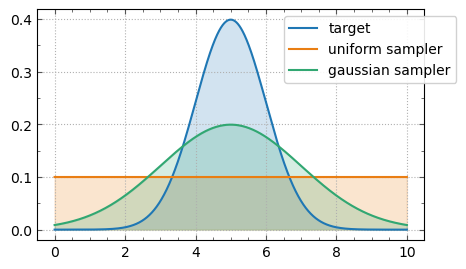

In [24]:
fig = plt.figure(figsize=(5,3))
plt.plot(x, target, label='target')
plt.fill_between(x, target, alpha=0.2)
plt.plot(x, sampler, label='uniform sampler', color='#E97E13')
plt.fill_between(x, sampler, alpha=0.2, color='#E97E13')
plt.plot(x, gaussSampler, label='gaussian sampler', color='#31A772')
plt.fill_between(x, gaussSampler, alpha=0.2, color='#31A772')

ax = plt.gca()
ax.tick_params(direction='in', top=True, right=True, color='#555555')  # Tick maggiori
ax.tick_params(axis='both', direction='in', which='minor', top=True, right=True, color='#555555')  # Tick minori
ax.xaxis.set_minor_locator(AutoMinorLocator(4))  
ax.yaxis.set_minor_locator(AutoMinorLocator(2))  
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1), fancybox=True, framealpha=.9)
plt.grid(linestyle='dotted')
plt.show()

we calculate the mean of the target using the method described above, updating the result at each step, i.e. for each new sample taken;

In [25]:
steps = np.arange(0, sampleN) #array of the sampling steps

xUni = np.zeros(sampleN) 
wUni = np.zeros(sampleN)
xGauss = np.zeros(sampleN)
wGauss = np.zeros(sampleN)

for i in range(sampleN):
    xUni[i] = np.random.uniform(lowerLimit, upperLimit) #uniform sampling
    wUni[i] = gauss(xUni[i], sigmaTarget, muTarget) / sampler[i] #weights of the uniform sampling
    xGauss[i] = np.random.normal(muSampler, sigmaSampler) #gaussian sampling
    wGauss[i] = gauss(xGauss[i], sigmaTarget, muTarget) / gauss(xGauss[i], sigmaSampler, muSampler) #weights of the gaussian sampling

#calculation of the target mean with the uniform sampling
fUni = [(np.sum(xUni[:i] * wUni[:i])) / (np.sum(wUni[:i])) for i in range(1, len(xUni) + 1)] 

#calculation of the target mean with the gaussian sampling
fGauss = [(np.sum(xGauss[:i] * wGauss[:i])) / (np.sum(wGauss[:i])) for i in range(1, len(xGauss) + 1)]    

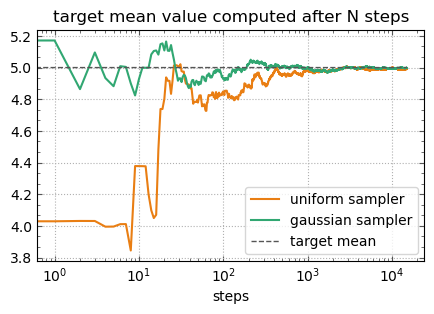

In [26]:
mean = np.full(sampleN, muTarget)
fig = plt.figure(figsize=(5,3))
plt.plot(steps, fUni, label='uniform sampler', color='#E97E13', linewidth=1.5)
plt.plot(steps, fGauss, label='gaussian sampler', color='#31A772', linewidth=1.5)
plt.plot(steps, mean, label='target mean', linestyle='dashed', linewidth=1, color='#555555')
plt.xlabel('steps')

ax = plt.gca()
ax.tick_params(direction='in', top=True, right=True, color='#555555')  # Tick maggiori
ax.tick_params(axis='both', direction='in', which='minor', top=True, right=True, color='#555555')  # Tick minori
ax.xaxis.set_minor_locator(AutoMinorLocator(5))  
ax.yaxis.set_minor_locator(AutoMinorLocator(3))  
plt.title('target mean value computed after N steps')
plt.xscale('log')

plt.legend()
plt.grid(linestyle='dotted')
plt.show()

finally, we repeat the same experiment a large number of times (5000) by taking 1000 sample each time; we compute the target mean using both uniform and gaussian sampler after 1000 samples for each experiment; we finally plot the distribution of the computed means; what we notice is that the mean is gaussian-like distributed, and that the gaussian sampler is (well, of course) slightly more accurate.

In [14]:
experiments = np.arange(5000) #number of time we repeat the experiment
sampleN2 = 1000 #number of samples
sampler2 = np.full(sampleN2, 1/(upperLimit - lowerLimit))

steps = np.arange(0, sampleN2)

xUni2 = np.zeros(sampleN2)
wUni2 = np.zeros(sampleN2)
xGauss2 = np.zeros(sampleN2)
wGauss2 = np.zeros(sampleN2)
fUniList = []
fGaussList = []

for j in enumerate(experiments):
    for i in range(sampleN2):
        xUni2[i] = np.random.uniform(lowerLimit, upperLimit)
        wUni2[i] = gauss(xUni2[i], sigmaTarget, muTarget) / sampler2[i]
        xGauss2[i] = np.random.normal(muSampler, sigmaSampler)
        wGauss2[i] = gauss(xGauss2[i], sigmaTarget, muTarget) / gauss(xGauss2[i], sigmaSampler, muSampler)

    #mean computed at the j-th experiment with i samples, uniform sampler
    fUni2 = (np.sum(xUni2[:i] * wUni2[:i])) / (np.sum(wUni2[:i])) 
    fUniList.append(fUni2) #list with the results

    #mean computed at the j-th experiment with i samples, gaussian sampler
    fGauss2 = (np.sum(xGauss2[:i] * wGauss2[:i])) / (np.sum(wGauss2[:i]))     
    fGaussList.append(fGauss2) #list with the results

fUniArray = np.array(fUniList) 
fGaussArray = np.array(fGaussList)

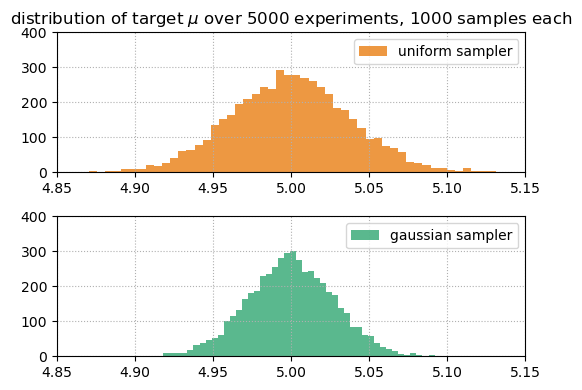

In [15]:
fig = plt.figure(figsize=(5.5, 4), facecolor=(1,1,1))
grid = plt.GridSpec(2, 1, height_ratios=[1, 1])

ax1 = fig.add_subplot(grid[0, 0])  
plt.hist(fUniArray, bins=50, color='#E97E13', alpha=0.8, label='uniform sampler')
ax1.set_title(r'distribution of target $\mu$ ' f'over {len(experiments)} experiments, {sampleN2} samples each')
plt.grid(linestyle='dotted')
plt.legend(loc='upper right')
plt.xlim(4.85, 5.15)
plt.ylim(0, 400)

ax2 = fig.add_subplot(grid[1, 0])  
plt.hist(fGaussArray, bins=50, color='#31A772', alpha=0.8, label='gaussian sampler')
plt.grid(linestyle='dotted')
plt.legend(loc='upper right')
plt.xlim(4.85, 5.15)
plt.ylim(0, 400)

plt.tight_layout()